# **Analisis data pada perkembangan kasus positif COVID-19 di Jawa Barat menggunakan metode Exploratory Data Analysis (EDA)**



---



**COVID-19** adalah penyakit yang mengakibatkan terinfeksinya
sistem pernapasan yang disebabkan oleh virus Severe Acute
Respiratory Syndrome 2 (SARS-CoV-2) yang dimulai dengan
gejala ringan seperti flu, hingga pneumonia.

Kasus pertama kali ditemukan pada bulan akhir Desember 2019 di
Wuhan, China.

Pada tanggal 7 Maret 2022 mengatakan bahwa ada 4.354 kasus
penularan lokal dan 14 kasus dari pelaku perjalanan luar negeri
(PPLN).

## **Ruang Lingkup**

1.   Penelitian menggunakan dataset yang berasal dari Open Data Jabar. Data yang digunakan dengan jumlah 843 data pada saat tanggal 18 Maret 2022. (https://opendata.jabarprov.go.id/id/dataset/perkembangan-harian-kasus-terkonfirmasi-positif-covid-19-di-jawa-barat).
2. Data diambil pada 18 Maret 2022.
3. Data yang diujikan menggunakan rentang waktu 1 Maret 2020 – 21 Juni 2022.

## **Tujuan**
 

*   Mengetahui jumlah lonjakan pada kategori tertentu setiap minggu
*   Mengidentifikasi data lima teratas setiap hari dan minggu
*   Mengetahui dinamika kasus COVID-19 dengan membuat grafik komparasi antara akumulasi kasus aktif, sembuh, dan meninggal

Hasil analisis tersebut ditujukan kepada para pembaca untuk menjadi tolak ukur di tahun berikutnya.


## **Hasil**

### 1. Import Library





In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.dates as mdates
import seaborn as sns
import math
from datetime import datetime
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

### 2. Pengumpulan Data

In [21]:
df = pd.read_csv('covid-19_jabar.csv')
print(df)

                tanggal  total_konfirmasi   sembuh  meninggal  aktif   id
0    2020-03-01 0:00:00                 2        0          0      2    1
1    2020-03-02 0:00:00                 2        0          0      2    2
2    2020-03-03 0:00:00                 2        0          1      1    3
3    2020-03-04 0:00:00                 4        0          1      3    4
4    2020-03-05 0:00:00                 4        0          1      3    5
..                  ...               ...      ...        ...    ...  ...
838  2022-06-17 0:00:00           1108277  1091131      15848   1298  839
839  2022-06-18 0:00:00           1108477  1091195      15849   1433  840
840  2022-06-19 0:00:00           1108639  1091255      15849   1535  841
841  2022-06-20 0:00:00           1108823  1091348      15854   1621  842
842  2022-06-21 0:00:00           1109114  1091440      15854   1820  843

[843 rows x 6 columns]


Output yang diperoleh dari hasil membaca file covid-19_jabar.csv yang terdapat data yang diinput yaitu 5 baris data awal dan 5 baris data terakhir. Tabel tersebut juga terdiri dari kolom tanggal, total_konfirmasi, sembuh, meninggal, aktif, dan id.

Data penelitian diperoleh dari situs resmi Open Data Jabar terdiri dari keseluruhan id dan tanggal terkonfirmasi serta 4 variabel yang ada pada tabel, yaitu:
  
1.   Persentase total kasus terkonfirmasi COVID-19
2.   Persentase kasus aktif COVID-19
3.   Persentase kasus meninggal COVID-19
4.   Persentase kasus sembuh COVID-19

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 843 entries, 0 to 842
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tanggal           843 non-null    object
 1   total_konfirmasi  843 non-null    int64 
 2   sembuh            843 non-null    int64 
 3   meninggal         843 non-null    int64 
 4   aktif             843 non-null    int64 
 5   id                843 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 39.6+ KB


Pada output di atas adalah informasi dari data yang dipakai yaitu ‘covid-19_jabar.csv’. Jika dilihat lebih seksama, pada kolom tanggal tidak memiliki tipe data datetime.

### 3. Pembersihan Data

In [22]:
df['tanggal'] = pd.to_datetime(df['tanggal'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 843 entries, 0 to 842
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   tanggal           843 non-null    datetime64[ns]
 1   total_konfirmasi  843 non-null    int64         
 2   sembuh            843 non-null    int64         
 3   meninggal         843 non-null    int64         
 4   aktif             843 non-null    int64         
 5   id                843 non-null    int64         
dtypes: datetime64[ns](1), int64(5)
memory usage: 39.6 KB


Output di atas terbukti bahwa kolom tanggal sudah terganti dari tipe data object menjadi tipe data datetime.

In [ ]:
df

,tanggal,total_konfirmasi,sembuh,meninggal,aktif,id
0,2020-03-01,2,0,0,2,1
1,2020-03-02,2,0,0,2,2
2,2020-03-03,2,0,1,1,3
3,2020-03-04,4,0,1,3,4
4,2020-03-05,4,0,1,3,5
...,...,...,...,...,...,...
838,2022-06-17,1108277,1091131,15848,1298,839
839,2022-06-18,1108477,1091195,15849,1433,840
840,2022-06-19,1108639,1091255,15849,1535,841
841,2022-06-20,1108823,1091348,15854,1621,842


### 4. Deskripsi Statistik

Deskripsi statistik ini terdiri dari:
1.   Count (Jumlah Data)
2.   Mean (Nilai Rata-Rata)
3. std (Standard Deviation dan Variance)
4. Min (Nilai Terendah)
5. 25% (Quartil Pertama)
6. 50% (Quartil Kedua)
7. 75% (Quartil Ketiga)
8. Max (Nilai Tertinggi)


In [ ]:
df.describe()

,total_konfirmasi,sembuh,meninggal,aktif,id
count,8.430000e+02,8.430000e+02,843.000000,843.000000,843.000000
mean,4.036706e+05,3.749963e+05,6729.392645,21944.877817,422.000000
std,3.905243e+05,3.753492e+05,6582.026312,35595.676161,243.497433
min,2.000000e+00,0.000000e+00,0.000000,1.000000,1.000000
25%,2.119850e+04,1.302850e+04,388.500000,1409.000000,211.500000
50%,2.763890e+05,2.428040e+05,3661.000000,8117.000000,422.000000
75%,7.073740e+05,6.916290e+05,14729.000000,28505.000000,632.500000
max,1.109114e+06,1.091440e+06,15854.000000,188698.000000,843.000000


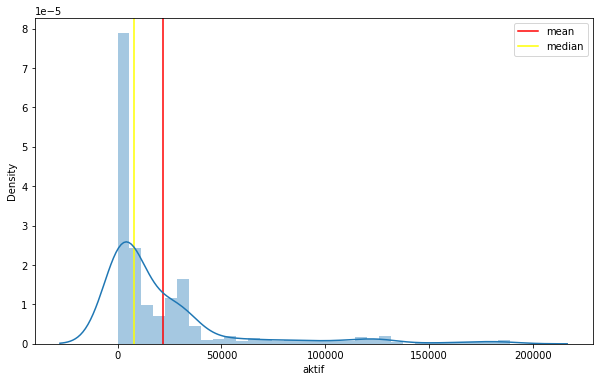

In [ ]:
plt.figure(figsize = (10, 6))
plt.axvline(df['aktif'].describe()['mean'], color = 'red', label = 'mean')
plt.axvline(df['aktif'].describe()['50%'], color = 'yellow', label = 'median')
sns.distplot(df['aktif'])
plt.legend()

####2. Quartil

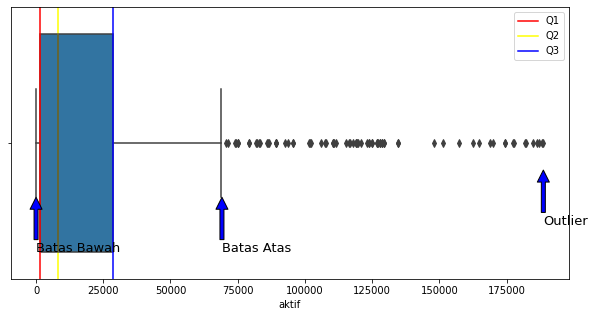

In [ ]:
plt.figure(figsize = (10, 5))
sns.boxplot(df['aktif'])
plt.axvline(df['aktif'].describe()['25%'], color = 'red', label = 'Q1')
plt.axvline(df['aktif'].describe()['50%'], color = 'yellow', label = 'Q2')
plt.axvline(df['aktif'].describe()['75%'], color = 'blue', label = 'Q3')
plt.annotate('Outlier', (df['aktif'].describe()['max'],0.1), xytext = (df['aktif'].describe()['max'],0.3),
             arrowprops = dict(facecolor = 'blue'), fontsize = 13 )
IQR = df['aktif'].describe()['75%'] - df['aktif'].describe()['25%']
plt.annotate('Batas Atas', (df['aktif'].describe()['75%'] + 1.5*IQR, 0.2), 
             xytext = (df['aktif'].describe()['75%'] + 1.5*IQR, 0.4),
             arrowprops = dict(facecolor = 'blue'), fontsize = 13 )
plt.annotate('Batas Bawah', (df['aktif'].describe()['min'], 0.2), 
             xytext = (df['aktif'].describe()['min'], 0.4),
             arrowprops = dict(facecolor = 'blue'), fontsize = 13 )
plt.legend()

Keterangan:
* Kuartil 1 terletak pada 2 jumlah kasus aktif COVID-19.
* Kuartil 2 


### 5. Visualisasi Data

Visualisasi data adalah suatu gambaran hasil dari analisis yang berbentuk visual agar dapat dipahami dengan mudah. Di tahap ini terdapat enam macam dalam memvisualisasi data, yaitu:

#### 1. Membuat Grafik Harian Kasus Aktif, Meninggal, dan Sembuh

#####- Grafik Harian Kasus Aktif

<Figure size 432x288 with 0 Axes>

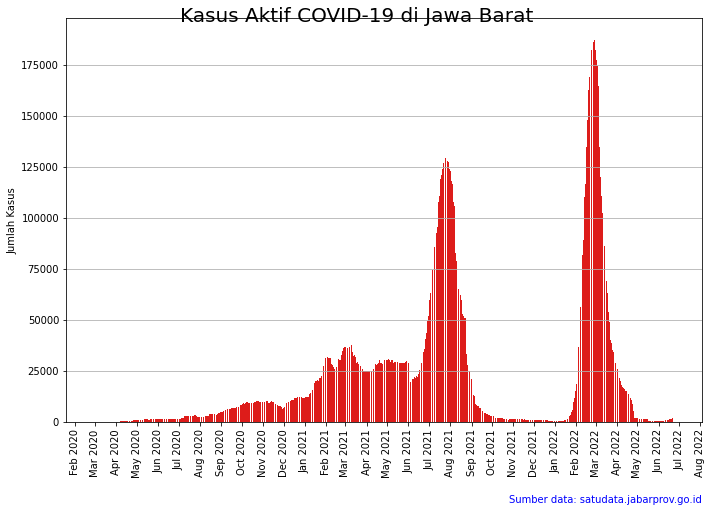

In [ ]:
plt.clf()
fig, ax = plt.subplots(figsize=[10,7])
ax.bar(data= df, x='tanggal' ,height='aktif', color='#dd1c1a')
fig.suptitle('Kasus Aktif COVID-19 di Jawa Barat', y=1.00, fontsize= 20,  ha='center')

ax.text(1, -0.2, 'Sumber data: satudata.jabarprov.go.id', color='blue',
ha='right', transform=ax.transAxes)
ax.set_xlabel('')
ax.set_ylabel('Jumlah Kasus')
ax.set_xticklabels(ax.get_xticks(), rotation= 90)
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.tight_layout()
plt.grid(axis='y')
plt.show()

Hasil sumber data opendata.jabarprov.go.id memperlihatkan kasus pada tahun 2020 silam sempat mengalami kenaikan pada akhir Oktober. Pada saat COVID-19 baru saja masuk ke Indonesia tetapi angka kenaikan kasus aktif masih di bawah 12.500 kasus. Sempat terjadinya sedikit penurunan sekitar 10.000 kasus di akhir bulan November walaupun pada awal bulan Desember mengalami kenaikan kasus aktif COVID-19. 

   Pada tahun 2021 lagi-lagi mengalami kenaikan kasus yang jika dibandingkan pada Oktober 2020, pada Maret 2021 mengalami kenaikan ± 37.500 kasus. Setelah kejadian di bulan Maret 2021, di bulan Juni 2021 mengalami penurunan mencapai kurang dari 25.000 kasus tetapi pada bulan Agustus 2021 mengalami kelonjakan kenaikan yang dapat mencapai 125.000 lebih kasus aktif dan di akhir bulan Desember 2021 mengalami penurunan yang sangat drastis yang dapat mencapai ± 100 kasus. 

   Di tahun 2022 di akhir bulan Maret mengalami kelonjakan yang sangat pesat hingga mencapai 187.500 kasus dan semakin mereda hingga ± 100 kasus di akhir bulan Mei 2022.

##### - Grafik Harian Kasus Meninggal

<Figure size 432x288 with 0 Axes>

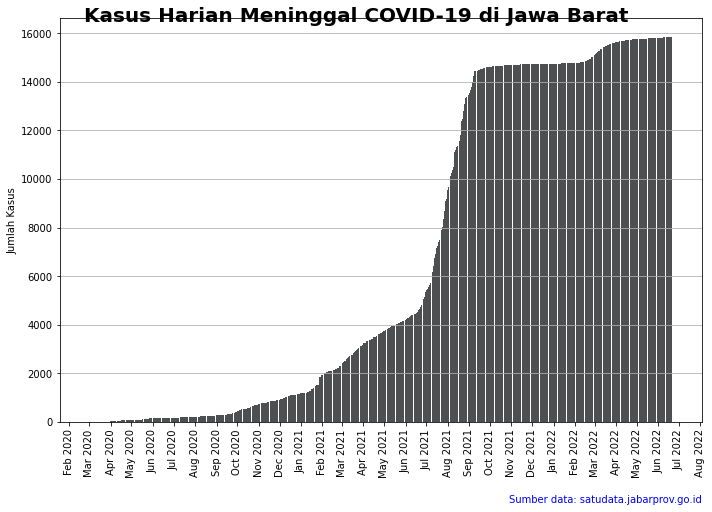

In [ ]:
plt.clf()
fig, ax = plt.subplots(figsize=[10,7])
ax.bar(data= df, x='tanggal' ,height='meninggal', color='#4E4F50')
fig.suptitle('Kasus Harian Meninggal COVID-19 di Jawa Barat', y=1.00, fontsize= 20, fontweight= 'bold', ha='center')
ax.text(1, -0.2, 'Sumber data: satudata.jabarprov.go.id', color='blue',
ha='right', transform=ax.transAxes)
ax.set_xlabel('')
ax.set_ylabel('Jumlah Kasus')
ax.set_xticklabels(ax.get_xticks(), rotation= 90)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.tight_layout()
plt.savefig('meninggal.png')
plt.grid(axis='y')
plt.show()

Hasil dari sumber data yang dilansir opendata.jabarprov.go.id memperlihatkan fluktuasi peningkatan kasus harian meninggal COVID-19 mulai dari Maret 2020 hingga akhir bulan Juni 2022. Terlihat jelas bahwa kasus meninggalnya pasien yang terdampak COVID-19 di Provinsi Jawa Barat cenderung meningkat dari bulan ke bulan. Akhir Juni 2022 diketahui meningkat kurang dari 16.000 kasus sembuh dari virus COVID-19.

##### - Grafik Harian Kasus Sembuh

<Figure size 432x288 with 0 Axes>

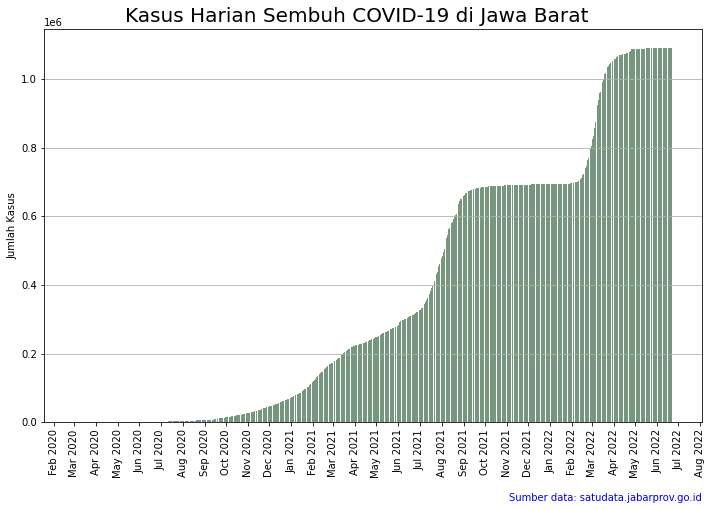

In [ ]:
plt.clf()
fig, ax = plt.subplots(figsize=[10,7])
ax.bar(data= df, x='tanggal' ,height='sembuh', color='#76977D')
fig.suptitle('Kasus Harian Sembuh COVID-19 di Jawa Barat', y=1.00, fontsize= 20,  ha='center')

ax.text(1, -0.2, 'Sumber data: satudata.jabarprov.go.id', color='blue',
ha='right', transform=ax.transAxes)
ax.set_xlabel('')
ax.set_ylabel('Jumlah Kasus')
ax.set_xticklabels(ax.get_xticks(), rotation= 90)
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.tight_layout()
plt.savefig('kasus harian Sembuh.png')
plt.grid(axis='y')
plt.show()

Hasil dari sumber data yang dilansir opendata.jabarprov.go.id berdasarkan pada Grafik 4.2 memperlihatkan fluktuasi peningkatan kasus harian sembuh COVID-19 mulai dari Juli 2020 hingga akhir bulan Juni 2022. Terlihat jelas bahwa kasus sembuhnya pasien yang terdampak COVID-19 di Provinsi Jawa Barat cenderung meningkat dari bulan ke bulan. Akhir Juni 2022 diketahui meningkat hingga 1.0*1e6 atau 1.000.000 kasus sembuh dari virus COVID-19.

#### 2. Membuat Grafik Komparasi Harian Antara Kasus Aktif, Meninggal, dan Sembuh

<Figure size 432x288 with 0 Axes>

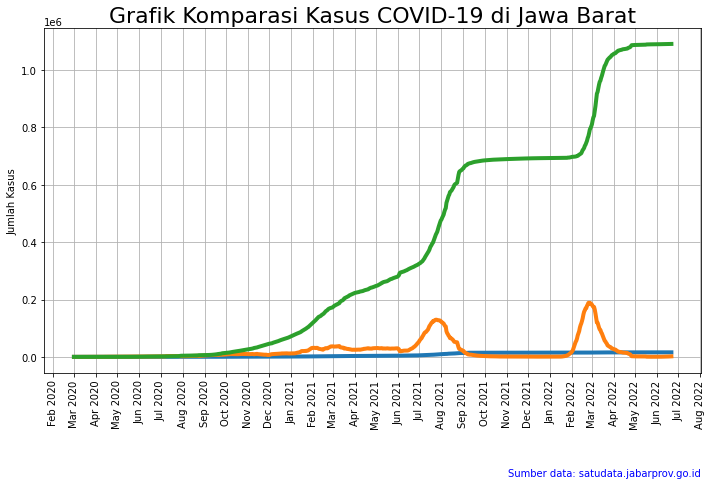

In [ ]:
plt.clf()
# buat line-chart pola kasus aktif dengan menggunakan method plot pada ax
fig, ax = plt.subplots(figsize=(10,7))
ax.plot('tanggal', 'meninggal', data=df, lw=4)
ax.plot('tanggal', 'aktif', data=df, lw=4)
ax.plot('tanggal', 'sembuh', data=df, lw=4)
ax.set_title('Grafik Komparasi Kasus COVID-19 di Jawa Barat',
             fontsize=22)
ax.set_xlabel('')
ax.set_ylabel('Jumlah Kasus')
ax.text(1, -0.3, 'Sumber data: satudata.jabarprov.go.id', color='blue', ha='right', transform=ax.transAxes)
ax.set_xticklabels(ax.get_xticks(), rotation= 90)
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid()
plt.tight_layout()
plt.show()

Keterangan grafik sebagai berikut:
*   Garis berwarna hijau untuk kasus sembuh.
*   Garis berwarna jingga untuk kasus aktif.
*   Garis berwarna biru untuk kasus meninggal.

Hasil komparasi pada 3 grafik yaitu kasus aktif, meninggal, dan sembuh menghasilkan meningkatnya kasus sembuh dari tahun ke tahun yang diperkirakan mencapai lebih dari 1.000.000 kasus.


#### 3. Menampilkan Lima Data Teratas per Minggu

In [ ]:
df_minggu = (df.set_index('tanggal')['total_konfirmasi']
                                   .resample('W')
                                   .sum()
                                   .reset_index()
                                   .rename(columns={'total_konfirmasi': 'jumlah'})
                    )
df_minggu ['tahun'] = df_minggu ['tanggal'].apply(lambda x: x.year)
df_minggu ['minggu_ke'] =  df_minggu ['tanggal'].apply(lambda x: x.weekofyear)
df_minggu = df_minggu [['tahun', 'minggu_ke', 'jumlah']]
print("Data lima teratas: \n", df_minggu.head())

Data lima teratas: 
    tahun  minggu_ke  jumlah
0   2020          9       2
1   2020         10      25
2   2020         11      63
3   2020         12     261
4   2020         13     640


Di minggu ke-9 sebanyak 2 kasus terkonfirmasi virus, di minggu ke-10 sebanyak 25 kasus terkonfirmasi virus, minggu ke-11 sebanyak 63 kasus terkonfirmasi virus, minggu ke-12 sebanyak 261 kasus terkonfirmasi virus, dan pada minggu ke-13 sebanyak 640 kasus terkonfirmasi virus. 

#### 4. Mengamati Grafik Fluktuasi Pertambahan Kasus per Minggu

In [ ]:
# method shift() untuk membuat kolom jumlah_minggulalu
df_minggu['jumlah_minggulalu'] = df_minggu['jumlah'].shift().replace(np.nan, 0).astype(np.int)
df_minggu['lebih_baik'] = df_minggu['jumlah'] < df_minggu['jumlah_minggulalu']

<Figure size 432x288 with 0 Axes>

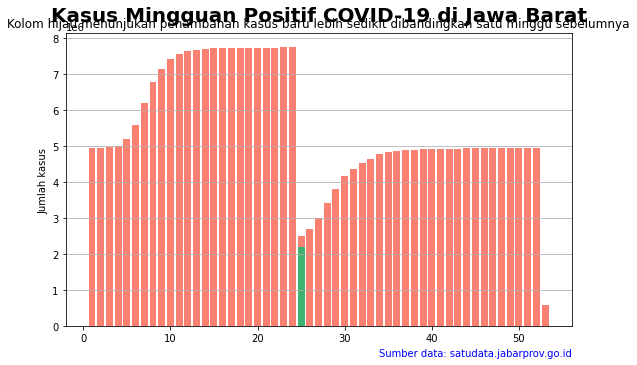

In [ ]:
# membuat grafik fluktuasi
plt.clf()
fig, ax = plt.subplots(figsize=(9,5))
ax.bar(data=df_minggu, x='minggu_ke', height='jumlah',
color=['mediumseagreen' if x is True else 'salmon' for x in df_minggu['lebih_baik']])
fig.suptitle('Kasus Mingguan Positif COVID-19 di Jawa Barat', y=1.00, fontsize=20, fontweight='bold', ha='center')
ax.set_title('Kolom hijau menunjukan penambahan kasus baru lebih sedikit dibandingkan satu minggu sebelumnya', fontsize=12, y=1.00)
ax.set_xlabel('')
ax.set_ylabel('Jumlah kasus')
ax.text(1, -0.1, 'Sumber data: satudata.jabarprov.go.id', color='blue', ha='right', transform=ax.transAxes)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Kasus mingguan Positif COVID-19 di Provinsi Jawa Barat dari minggu pertama meningkat cukup pesat ke jumlah kasus rata-rata 7 juta sampai 8 juta. Di minggu ke 25 dapat diketahui penambahan kasus baru lebih sedikit dibandingkan dengan 24 minggu sebelumnya. Namun dari minggu ke 24 sampai minggu ke 52 kasus positif COVID-19 kembali naik perlahan dan berhenti beberapa minggu dengan rata-rata konstan penambahan 5 juta kasus, terlihat juga di minggu ke 53 sesuai data akhir angka positif COVID-19 secara drastis menurun di bawah 1 juta kasus perminggu.

#### 5. Menghitung Nilai Akumulasi Kasus Aktif, Meninggal, dan Sembuh

In [ ]:
#menggunakan method cumsum()
df_akumulasi = df[['tanggal']].copy()
df_akumulasi['akumulasi_aktif'] = (df['total_konfirmasi'] - df['sembuh'] - df['meninggal']).cumsum()
df_akumulasi['akumulasi_sembuh'] = df['sembuh'].cumsum()
df_akumulasi['akumulasi_meninggal'] = df['meninggal'].cumsum()
df_akumulasi.tail()

,tanggal,akumulasi_aktif,akumulasi_sembuh,akumulasi_meninggal
838,2022-06-17,18493123,311756684,5609472
839,2022-06-18,18494556,312847879,5625321
840,2022-06-19,18496091,313939134,5641170
841,2022-06-20,18497712,315030482,5657024
842,2022-06-21,18499532,316121922,5672878


Terlihat pada 5 baris terakhir pada data yang menampilkan ekor dari seluruh data, akumulasi kasus aktif meningkat setiap harinya. Dari tanggal 17 - 18 Juni 2022 kasus meningkat sebanyak 1.433, 18 – 19 Juni 2022 meningkat sebanyak 1.535, 19 – 20 Juni 2022 meningkat sebanyak 1.621, dan 20 – 21 Juni 2022 meningkat sebanyak 1.820. Jika diperhatikan, adanya kenaikan kasus yang terjadi dari  20 – 21 Juni 2022 hampir mencapai 200 kasus dibanding hari-hari sebelumnya dan untuk akumulasi kasus sembuh dan kematian makin meningkat hari demi hari.

#### 6. Membuat Grafik Komparasi antara Akumulasi Aktif, Meninggal, dan Sembuh

<Figure size 432x288 with 0 Axes>

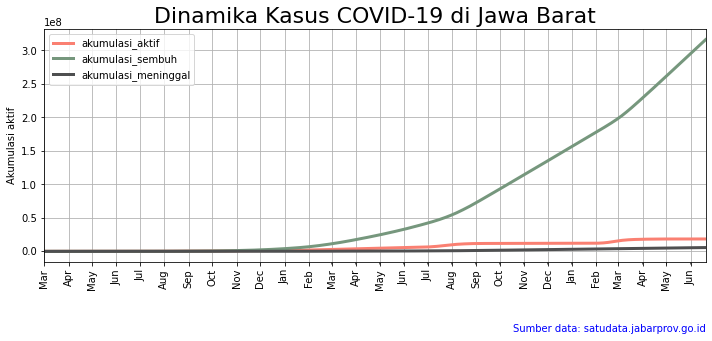

In [ ]:
plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
df_akumulasi.plot(x='tanggal', kind='line', ax=ax, lw=3, color=['salmon', '#76977D', '#4E4F50'])
ax.set_title('Dinamika Kasus COVID-19 di Jawa Barat', fontsize=22)
ax.set_xlabel('')
ax.set_ylabel('Akumulasi aktif')
ax.set_xticklabels(ax.get_xticks(), rotation= 90)

ax.text(1, -0.3, 'Sumber data: satudata.jabarprov.go.id', color='blue', ha='right', transform=ax.transAxes)
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.grid()
plt.tight_layout()
plt.show()

Akumulasi kasus sembuh meningkat dari tahun ke tahun. Akumulasi kasus aktif menunjukan bahwa masyarakat harus tetap waspada menggunakan masker dan menjaga kebersihan badan dan lingkungan guna menjaga kelonjakan yang disebabkan naiknya akumulasi kasus aktif. Pada akumulasi meninggal hanya sedikit dari tahun ke tahun.

## **Kesimpulan**

1. Visualisasi dalam bentuk bar chart memberi gambaran mengenai kasus harian dan mingguan di Jawa Barat yang memiliki kasus terkonfirmasi, kematian, dan kesembuhan. 
2. Visualisasi dalam bentuk line chart memberi gambaran komparasi tiap kasus harian dan mingguan.

## **Saran**

Penelitian ini diharapkan dapat mengembangkan model visualisasi data seperti pie chart, line plot, scatter plot, dan bar plot. Kekurangan metode EDA dalam kasus yang diangkat tidak dapat memprediksi adanya kenaikan atau penurunan angka kasus COVID-19. Saran dari penelitian selanjutnya metode EDA dapat dikembangkan secara bersamaan dengan metode regresi linier agar dapat memprediksi adanya kenaikan dan penurunan kasus COVID-19.